<a href="https://www.kaggle.com/code/piyushjain572/simple-imputer?scriptVersionId=200004146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('/kaggle/input/modified-titanic-dataset/train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])
df['Family'] = df['SibSp'] + df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [13]:
#df['Fare'].iloc[-45:0] = np.nan
index_labels = df.index[-45:]
df.loc[index_labels,'Fare'] = np.nan

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      846 non-null    float64
 3   Family    891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [15]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.050505
Family      0.000000
dtype: float64

In [57]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=2)
X_train.shape

(712, 3)

In [18]:
X_train.isnull().mean()

Age       0.207865
Fare      0.049157
Family    0.000000
dtype: float64

# Handling Missing Values from Numerical Cols

### Mean/Median Imputation

In [19]:
trf = ColumnTransformer(transformers=[
    ('Age_imputer',SimpleImputer(strategy='mean'),[0]),
    ('Fare_imputer',SimpleImputer(strategy='median'),[1])
],remainder='passthrough')

In [20]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [21]:
X_train_trf = pd.DataFrame(X_train_trf,columns=X_train.columns)
X_test_trf = pd.DataFrame(X_test_trf,columns=X_train.columns)

In [22]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train_trf['Age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train_trf['Fare'].var())

Original Age variable variance:  204.34951339046142
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2435.7565394303597
Fare Variance after median imputation:  2331.1896631920367


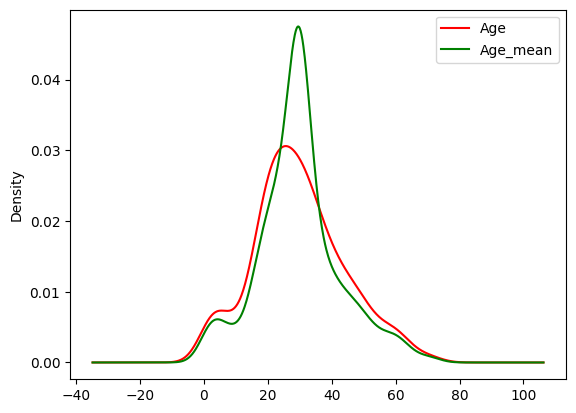

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train_trf['Age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels[1] = 'Age_mean'
ax.legend(lines, labels, loc='best')

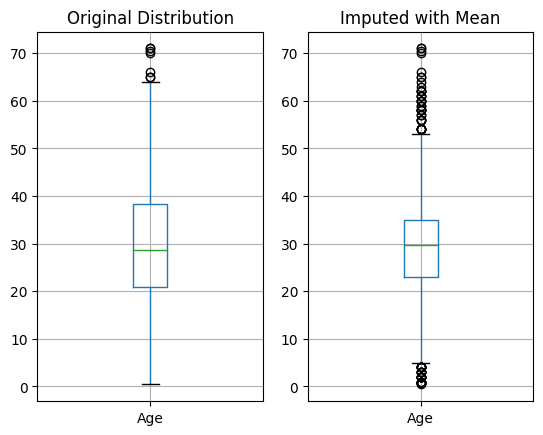

In [46]:
fig = plt.figure()
ax1,ax2 = fig.subplots(ncols=2)

# original variable distribution
X_train[['Age']].boxplot(ax=ax1)

# variable imputed with the median
X_train_trf[['Age']].boxplot(ax=ax2)

# Setting title
ax1.set_title('Original Distribution')
ax2.set_title("Imputed with Mean")

plt.show()

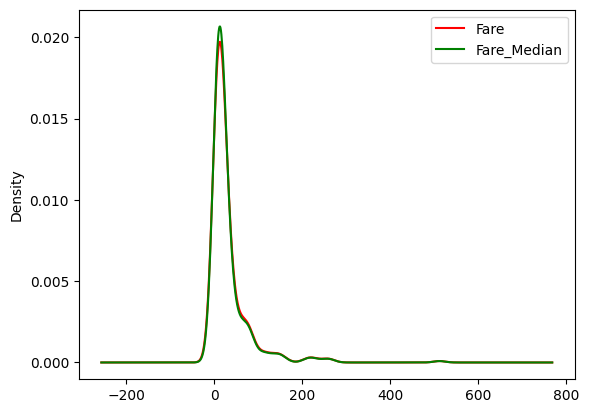

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train_trf['Fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels[1] = 'Fare_Median'
ax.legend(lines, labels, loc='best')

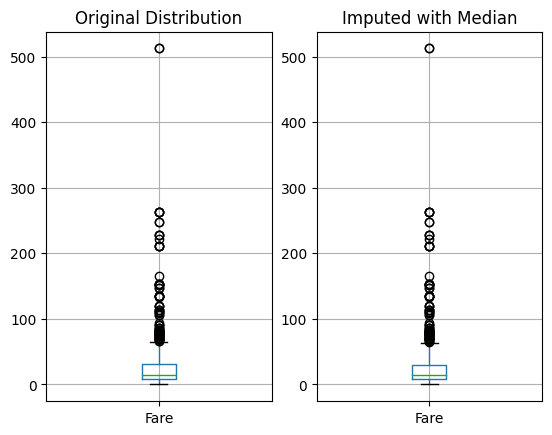

In [45]:
fig = plt.figure()
ax1,ax2 = fig.subplots(ncols=2)

# original variable distribution
X_train[['Fare']].boxplot(ax=ax1)

# variable imputed with the median
X_train_trf[['Fare']].boxplot(ax=ax2)

# Setting title
ax1.set_title('Original Distribution')
ax2.set_title("Imputed with Median")

plt.show()

### Arbitary Value Imputation

In [58]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [48]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2435.7565394303597
Fare Variance after 999 wala imputation:  46029.764249365966
Fare Variance after -1 wala imputation:  2368.700223385782


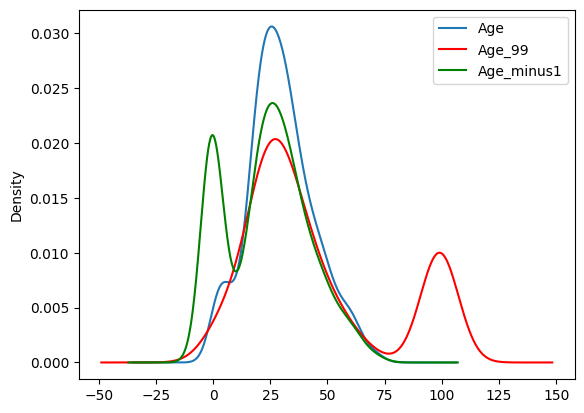

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

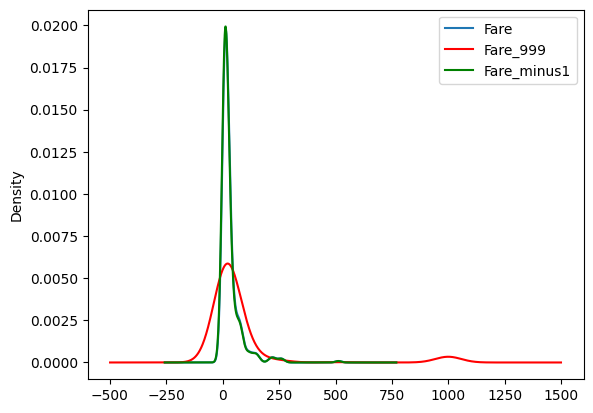

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [51]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.084649,-0.299113,1.000000,1.000000,-0.018022,0.087946
Fare,0.084649,1.000000,0.207511,-0.078903,0.144189,1.000000,1.000000
Family,-0.299113,0.207511,1.000000,-0.144787,-0.140668,0.092013,0.189650
Age_99,1.000000,-0.078903,-0.144787,1.000000,-0.344476,-0.049546,-0.071289
Age_minus1,1.000000,0.144189,-0.140668,-0.344476,1.000000,0.021243,0.141492
Fare_999,-0.018022,1.000000,0.092013,-0.049546,0.021243,1.000000,0.076226
Fare_minus1,0.087946,1.000000,0.189650,-0.071289,0.141492,0.076226,1.000000


In [52]:
trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='constant',fill_value=99),['Age']),
    ('imputer2',SimpleImputer(strategy='constant',fill_value=999),['Fare'])
],remainder='passthrough')

In [59]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [54]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [60]:
X_train_trf = trf.transform(X_train)

In [61]:
X_train_trf

array([[ 40.    ,  27.7208,   0.    , ...,  40.    ,  27.7208,  27.7208],
       [  4.    ,  16.7   ,   2.    , ...,   4.    ,  16.7   ,  16.7   ],
       [ 47.    , 999.    ,   0.    , ...,  47.    , 999.    ,  -1.    ],
       ...,
       [ 71.    ,  49.5042,   0.    , ...,  71.    ,  49.5042,  49.5042],
       [ 99.    , 221.7792,   0.    , ...,  -1.    , 221.7792, 221.7792],
       [ 99.    ,  25.925 ,   0.    , ...,  -1.    ,  25.925 ,  25.925 ]])

# Handling Missing Values from Categorical Cols

### Frequent_Value/Mode Imputation

In [3]:
df = pd.read_csv('/kaggle/input/house-price-prediction/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

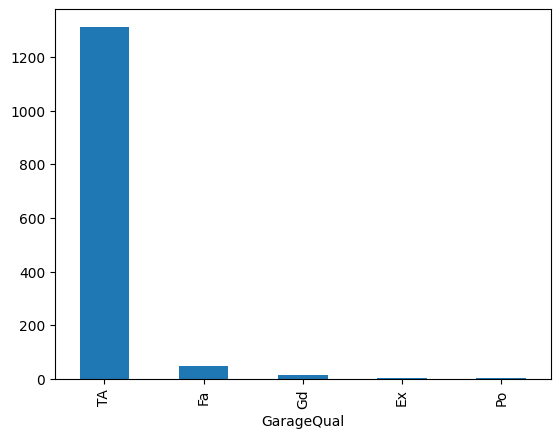

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [7]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [10]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

<Axes: xlabel='GarageQual'>

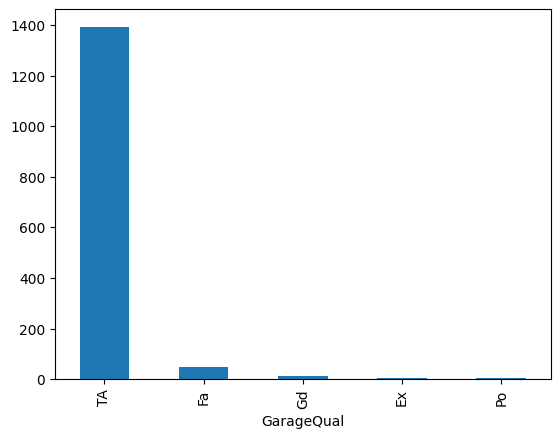

In [11]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

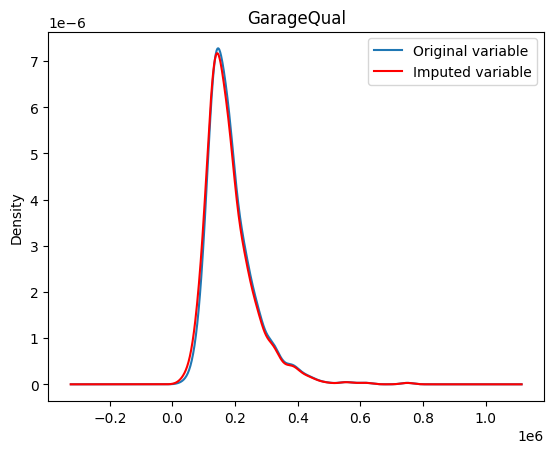

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

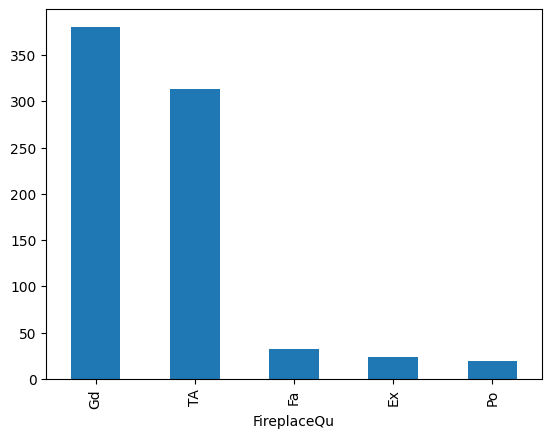

In [13]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [14]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

In [15]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [16]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')

<Axes: xlabel='FireplaceQu'>

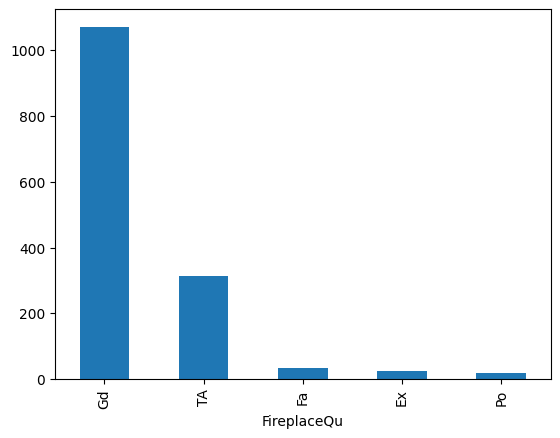

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

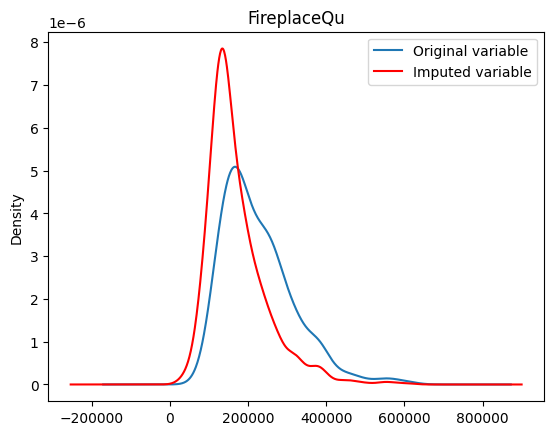

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [25]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),
                                                df['SalePrice'],
                                                test_size=0.2,
                                                random_state=2)
X_train.shape

(1168, 2)

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [26]:
X_train_trf = imputer.fit_transform(X_train)
X_test_trf = imputer.transform(X_train)

In [29]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### 'Missing' Value Imputation

In [30]:
df = pd.read_csv('/kaggle/input/house-price-prediction/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


Text(0, 0.5, 'Number of houses')

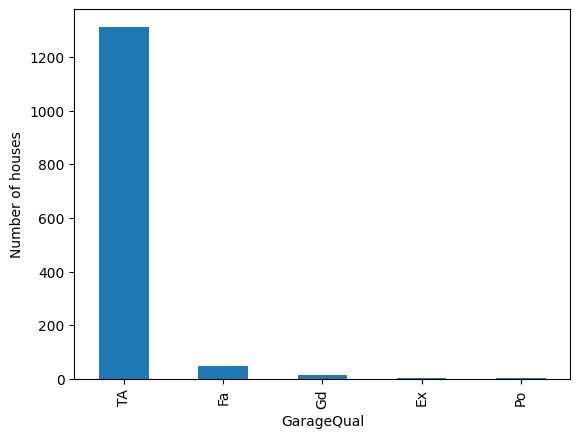

In [31]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [33]:
df['GarageQual'] = df['GarageQual'].fillna('Missing')

Text(0, 0.5, 'Number of houses')

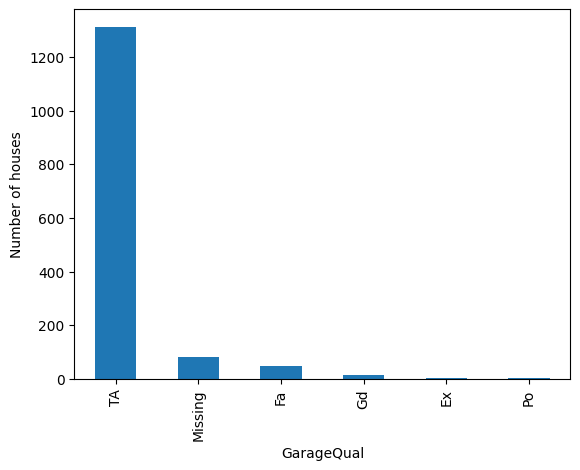

In [34]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [36]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [39]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

### Missing Indicator Technique - applicable for both numerical and categorical missing data.

In [41]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [42]:
df = pd.read_csv('/kaggle/input/modified-titanic-dataset/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

#### Before applying missing indicator

In [44]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6480446927374302

#### Before applying missing indicator

In [47]:
mi = MissingIndicator()

mi.fit(X_train)

mi.features_

array([0])

In [49]:
X_train['Age_NA'] = mi.transform(X_train)
X_test['Age_NA'] = mi.transform(X_test)

In [50]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6480446927374302

#### Simple Imputer Class also gives us option to add indicator

In [52]:
si = SimpleImputer(add_indicator=True)

In [53]:
X_train_trf3 = si.fit_transform(X_train)
X_test_trf3 = si.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf3,y_train)

y_pred = clf.predict(X_test_trf3)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6424581005586593